# **SPAM SMS DETECTION**

Build an AI model that can classify SMS messages as spam or
 legitimate. Use techniques like TF-IDF or word embeddings with
 classifiers like Naive Bayes, Logistic Regression, or Support Vector
 Machines to identify spam messages

**Install Required Libraries**

In [1]:
pip install pandas scikit-learn matplotlib seaborn


**Load Dataset**

In [2]:
import pandas as pd

# Load data
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Binary labels
print(df.head())


   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


 **Preprocess the Text**

In [3]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Clean text
df['message'] = df['message'].apply(lambda x: re.sub(r'\W', ' ', x.lower()))

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


 **Train Models**

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



Naive Bayes - Accuracy: 0.9668
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Logistic Regression - Accuracy: 0.9525
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115


SVM - Accuracy: 0.9785
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.9

**Visualize Class Distribution**

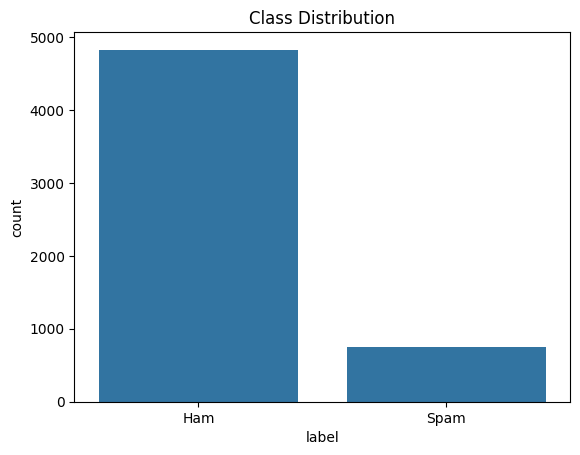

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Class Distribution")
plt.show()
